In [300]:
from requests import get
import json
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bearer_token = 'AAAAAAAAAAAAAAAAAAAAADjHJAEAAAAArc7yUgutuObq5ejL7MtU5kdfi0Y%3DnYSK0aX1moZSCGPNo9JpJJdUyZMTKOwLCn7VPIOAOmA1dMSOyt'

In [11]:
def le_tweet(url, token):
    header = {
        "Authorization": "Bearer {}".format(bearer_token),
        "Content-Type": "application/json",
    }
    r = get(url, headers=header)
    return json.loads(r.text)

#### Busca um _tweet_ pelo _id_

In [38]:
url = "https://api.twitter.com/2/tweets/20?expansions=author_id"

In [40]:
resposta = le_tweet(url, token=bearer_token)
pd.DataFrame(resposta)

,data,includes
author_id,12,NaN
id,20,NaN
text,just setting up my twttr,NaN
users,NaN,"[{'id': '12', 'name': 'jack', 'username': 'jac..."


#### Busca _Username_

In [44]:
url = 'https://api.twitter.com/2/users/by?usernames=eng_gusta'

In [45]:
resposta = le_tweet(url, token=bearer_token)

In [46]:
pd.DataFrame(resposta['data'])

,id,name,username
0,924646342743482368,Gustavo Cavalcanti,eng_gusta


#### Busca um conteúdo recente

In [370]:
handle = 'ElonMusk'
num_tweets = 50

In [371]:
url = f'https://api.twitter.com/2/tweets/search/recent?query=from:{handle}&tweet.fields=created_at&expansions=author_id&user.fields=created_at&max_results={num_tweets}'

In [372]:
resposta = le_tweet(url, token=bearer_token)

In [373]:
pd.DataFrame(resposta['data']).head(15)

,created_at,id,text,author_id
0,2020-10-28T00:19:44.000Z,1321245225755512832,@TheWPMontgomery @pcgamer One of the best game...,44196397
1,2020-10-28T00:18:06.000Z,1321244816378834946,@ThatDudeShannon @pcgamer FEAR 1 with modern g...,44196397
2,2020-10-28T00:16:43.000Z,1321244469325406208,@1matthewgarcia @pcgamer Ok :),44196397
3,2020-10-28T00:09:03.000Z,1321242538427273217,@ZZCOOL @pcgamer All games in this thread are ...,44196397
4,2020-10-28T00:05:57.000Z,1321241757179326466,@pcgamer FEAR 2 is best imo. Also Dead Space 2...,44196397
5,2020-10-27T23:39:31.000Z,1321235107324268544,@rakyll https://t.co/p1aGokwQpV,44196397
6,2020-10-27T22:50:08.000Z,1321222678393610240,@jgrano305 @flcnhvy To the best of my knowledg...,44196397
7,2020-10-27T22:43:55.000Z,1321221115096801282,@flcnhvy All that was left were broken bots &a...,44196397
8,2020-10-27T22:38:11.000Z,1321219671174094851,@flcnhvy And there were actually zero employee...,44196397
9,2020-10-27T22:33:21.000Z,1321218455337578498,@ajtourville Bettern nothin or ur 💰 back!,44196397


In [374]:
lista_palavras = []
for tw in pd.DataFrame(resposta['data'])['text']:
    palavras_do_tweet = tw.split()
    lista_palavras.extend(palavras_do_tweet)

In [375]:
contagem = Counter(lista_palavras)
df = pd.DataFrame.from_dict(contagem, orient='index', columns=['Número de Ocorrências']).sort_values(by='Número de Ocorrências')
df.sort_values(by='Número de Ocorrências', ascending=False)

,Número de Ocorrências
to,15
a,15
of,12
the,12
&amp;,12
...,...
gets,1
orbit,1
Got,1
little,1


In [376]:
sns.set_style("darkgrid")

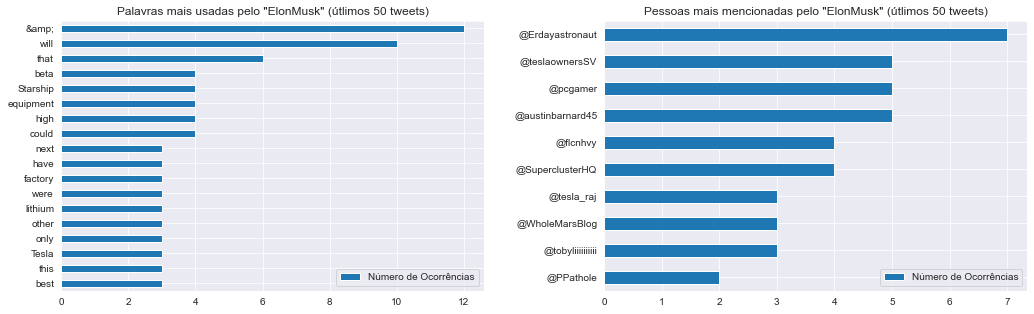

In [377]:
compr_minimo = df.index.str.len() > 3
ocor_minimas = df['Número de Ocorrências'] > 2
sem_mencoes, com_mencoes = ~df.index.str.contains('@'), df.index.str.contains('@')

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
try:
    df[compr_minimo & ocor_minimas & sem_mencoes].plot.barh(
    title=f'Palavras mais usadas pelo "{handle}" (útlimos {num_tweets} tweets)', ax=axs[0])
except:
    pass
try:
    df[com_mencoes].sort_values(by='Número de Ocorrências')[-10:].plot.barh(
    title=f'Pessoas mais mencionadas pelo "{handle}" (útlimos {num_tweets} tweets)', ax=axs[1])
except:
    pass
plt.tight_layout(pad=3.0)
plt.show()